# The following data analysis explores IT contracts awarded to private companies by the State of Washington.

Bottom Line Up Front: an IT comapany focusing on the 'End User', is more likely to get awarded a 5_yr contract, if the company is part of a cooperative-purchase.

Research Questions:

# Which Washington State agencies issue the largest IT contracts by 'Total Contract Amount'?
# Which state agencies have the longest contracts?
# Which state agencies issue the most 10 year contracts?
# Which state agencies issue the most 5 year contracts?
# Who are the top hired tech contractors?
# Which contractor has the longest contract?
# Which contractors have the most 10 year contracts?
# Which contractors have the most 5_yr contracts?
# Can a predictive model be created to forecast 'Total Contract Amount'?
# Can a Market Basket Analysis be used to predict Washington State agencys' IT-contract-purchasing-behavior? 

The Washington State Organizaions/Institutions evaluate IT contracts based off the following service charachteristics: 

Cooperative Purchase\n(Yes/No), Application, Compute, Data Center, End User,Delivery, Network, IT Managment, Output, Platform, Security, Storage, Other/Non-IT.

The dataset is 4684 rows with other 69 columns; 3 additional variables where engineered for exploration and testing. They are "total_time", "5_yr" (representing 5 year contracts), and "10_yr" (representing 10 year contracts).

The following machine learning models where used to explore the dataset and attempt to make accurate predictions:

Principal Component Analysis, K-Means Clustering, Random Forrest Regressor, XGboost, and Market Basket Analysis.

Market Basket Analysis was the most informative model; Yeilding 7 association rules with confidence over 50%.

PCA
Null Hypothesis (H0):
There is no significant reduction in dimensionality achieved by PCA.
The variance explained by the first k principal components is not significantly different from the total variance in the original dataset.

Alternative Hypothesis (H1):
There is a significant reduction in dimensionality achieved by PCA.
The variance explained by the first k principal components is significantly different from the total variance in the original dataset.


Kmeans Clustering 
Null Hypothesis (H2):
There is no significant difference between the groups identified by k-means clustering.
The centroids of the clusters do not significantly differ from each other.

Alternative Hypothesis (H3):
There is a significant difference between the groups identified by k-means clustering.
At least one pair of cluster centroids is significantly different from each other.

Random Forrest Regressor
Null Hypothesis (H4):
There is no significant relationship between the predictor variables and the target variable in the context of a Random Forest model.
The average prediction made by the Random Forest model is no different from the average of the actual target variable.

Alternative Hypothesis (H5):
There is a significant relationship between the predictor variables and the target variable in the context of a Random Forest model.
The average prediction made by the Random Forest model is significantly different from the average of the actual target variable.

XGboost
Null Hypothesis (H6):
There is no significant relationship between the predictor variables and the target variable in the context of a XGboost model.
The average prediction made by the XGboost model is no different from the average of the actual target variable.

Alternative Hypothesis (H7):
There is a significant relationship between the predictor variables and the target variable in the context of a XGboost model.
The average prediction made by the XGboost model is significantly different from the average of the actual target variable.

MBA 
Null Hypothesis (H8): 
There is NO significant association between the contract purchase of The State of Washington and product / service attributes.

Alternative Hypothesis (H9):
There IS A significant association between the contract purchase of The State of Washington and product / service attributes.

Get a copy of the dataset here:
https://data.wa.gov/dataset/IT-Contracts-Report-2022/dzvi-rs2c/about_data

# Data import and cleaning

In [1]:
#-- Importing liberaries --#

import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor 
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

2024-01-18 00:00:59.655356: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#-- Importing the raw data set and creating a pandas data frame named 'df_raw' --#
df_raw = pd.read_csv('/Users/michaelsegaline/Desktop/IT Contracts/IT_Contracts_Report_2023.csv')

In [3]:
#-- Inspecting the dataset --#
df_raw.head()

,Agency Number - Agency Name,Contractor Name,Cooperative Purchase\n(Yes/No),Contract Start Date,Contract End,Application,Compute,Data Center,Delivery,End User,...,Contract Amount FY42,Contract Amount FY43,Contract Amount FY44,Contract Amount FY45,Contract Amount FY46,Contract Amount FY47,Contract Amount FY48,Contract Amount FY49,Contract Amount FY50,Total Contract Amount
0,075 - Office of the Governor (GOV),SHI,1.0,4/1/21 0:00,4/1/23,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,41480.64
1,075 - Office of the Governor (GOV),Office of Financial Management,0.0,7/1/20 0:00,6/30/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,32627.85
2,075 - Office of the Governor (GOV),Office of Financial Management,0.0,7/1/20 0:00,6/30/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,41100.00
3,075 - Office of the Governor (GOV),WordPress,0.0,1/7/22 0:00,1/7/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,328.20
4,075 - Office of the Governor (GOV),Dropbox,0.0,5/27/22 0:00,5/27/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,119.88


In [4]:
#-- Making a copy of the dataset --#
df_raw =df_raw.copy()

In [5]:
#-- Inspecting the Shape of the Dataset --#
df_raw.shape

(4686, 69)

In [6]:
#-- Exploring intitial descriptive statistics --#
df_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cooperative Purchase\n(Yes/No),4648.0,2.689329e-01,4.434527e-01,0.00,0.0000,0.000,1.000,1.000000e+00
Application,4675.0,3.387893e-01,4.278495e-01,0.00,0.0000,0.000,1.000,1.000000e+00
Compute,4654.0,3.542759e-02,1.401610e-01,0.00,0.0000,0.000,0.000,1.000000e+00
Data Center,4653.0,1.799699e-02,1.035834e-01,0.00,0.0000,0.000,0.000,1.000000e+00
Delivery,4653.0,6.740383e-02,2.137243e-01,0.00,0.0000,0.000,0.000,1.000000e+00
End User,4659.0,2.572118e-01,3.865857e-01,0.00,0.0000,0.000,0.600,1.000000e+00
IT Management,4656.0,2.646692e-02,1.520341e-01,0.00,0.0000,0.000,0.000,1.000000e+00
Network,4656.0,1.292290e-01,2.983842e-01,0.00,0.0000,0.000,0.000,1.000000e+00
Output,4653.0,8.005588e-03,8.406316e-02,0.00,0.0000,0.000,0.000,1.000000e+00
Platform,4653.0,3.023641e-02,1.537148e-01,0.00,0.0000,0.000,0.000,1.000000e+00


In [7]:
#-- Inspecting the column types --#
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Agency Number - Agency Name    4686 non-null   object 
 1   Contractor Name                4686 non-null   object 
 2   Cooperative Purchase
(Yes/No)  4648 non-null   float64
 3   Contract Start Date            4684 non-null   object 
 4   Contract End                   4686 non-null   object 
 5   Application                    4675 non-null   float64
 6   Compute                        4654 non-null   float64
 7   Data Center                    4653 non-null   float64
 8   Delivery                       4653 non-null   float64
 9   End User                       4659 non-null   float64
 10  IT Management                  4656 non-null   float64
 11  Network                        4656 non-null   float64
 12  Output                         4653 non-null   f

In [8]:
#-- Check for Null or 'missing' values in the dataset --#
df_raw.isnull().sum()

Agency Number - Agency Name        0
Contractor Name                    0
Cooperative Purchase\n(Yes/No)    38
Contract Start Date                2
Contract End                       0
                                  ..
Contract Amount FY47              49
Contract Amount FY48              49
Contract Amount FY49              49
Contract Amount FY50              49
Total Contract Amount              0
Length: 69, dtype: int64

In [9]:
#-- Checking duplicate values --#
df_raw.duplicated().sum()

12

In [85]:
#-- Dropping duplicate values --#
#-- The Dataset is 0.018% sparse after dropping the data --#
df_raw.drop_duplicates()

,Agency Number - Agency Name,Contractor Name,Cooperative Purchase\n(Yes/No),Contract Start Date,Contract End,Application,Compute,Data Center,Delivery,End User,...,Contract Amount FY42,Contract Amount FY43,Contract Amount FY44,Contract Amount FY45,Contract Amount FY46,Contract Amount FY47,Contract Amount FY48,Contract Amount FY49,Contract Amount FY50,Total Contract Amount
0,075 - Office of the Governor (GOV),SHI,1.0,4/1/21 0:00,4/1/23,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,41480.64
1,075 - Office of the Governor (GOV),Office of Financial Management,0.0,7/1/20 0:00,6/30/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,32627.85
2,075 - Office of the Governor (GOV),Office of Financial Management,0.0,7/1/20 0:00,6/30/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,41100.00
3,075 - Office of the Governor (GOV),WordPress,0.0,1/7/22 0:00,1/7/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,328.20
4,075 - Office of the Governor (GOV),Dropbox,0.0,5/27/22 0:00,5/27/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,119.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,085 - Office of the Secretary of State (SEC),XRLIBRARIES,0.0,3/18/22 0:00,6/30/23,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5100.00
4682,085 - Office of the Secretary of State (SEC),PARKER SOFTWARE INC,0.0,4/17/22 0:00,99/99/9999,NaN,NaN,NaN,NaN,1.0,...,5600,5600,5600,5600,5600,5600,5600,5600,5600,162320.00
4683,085 - Office of the Secretary of State (SEC),Niche Academy Llc,0.0,6/1/22 0:00,5/31/23,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.00
4684,085 - Office of the Secretary of State (SEC),South Puget Sound Comm College,0.0,6/2/22 0:00,12/31/23,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100800.00


In [11]:
#-- Calculate the percentage of missing values for each column --#
na_percentage = (df_raw.isnull().sum() / len(df_raw)) * 100

#-- Create a DataFrame to store the results --#
na_percentage_df = pd.DataFrame({'Column': na_percentage.index, 'Percentage': na_percentage.values})

#-- Sort the DataFrame in descending order based on the percentage of missing values --#
na_percentage_df = na_percentage_df.sort_values(by='Percentage', ascending=False)

#-- Print the results --#
print("Missing Value Counts (Percentage-wise, Descending Order):\n")
print(na_percentage_df)

Missing Value Counts (Percentage-wise, Descending Order):

                         Column  Percentage
17         Contract Amount FY00     1.25907
26         Contract Amount FY09     1.25907
25         Contract Amount FY08     1.25907
24         Contract Amount FY07     1.25907
23         Contract Amount FY06     1.25907
..                          ...         ...
0   Agency Number - Agency Name     0.00000
39         Contract Amount FY22     0.00000
1               Contractor Name     0.00000
4                  Contract End     0.00000
68        Total Contract Amount     0.00000

[69 rows x 2 columns]


In [12]:
#-- Dropping rows w/ null or missing values --#
df_clean = df_raw.dropna()

In [13]:
#-- Inspecting the shape after cleaning --#
df_clean.shape

(4586, 69)

In [14]:

#-- Convert 'date' column to datetime --#
df_clean['StartDate'] = pd.to_datetime(df_clean['Contract Start Date'])

In [15]:
#-- Parsing contract start dates; Extract month and year into separate columns --#
df_clean['StartMonth'] = df_clean['StartDate'].dt.month
df_clean['StartYear'] = df_clean['StartDate'].dt.year

#-- Display the modified DataFrame --#
df_clean.head()

,Agency Number - Agency Name,Contractor Name,Cooperative Purchase\n(Yes/No),Contract Start Date,Contract End,Application,Compute,Data Center,Delivery,End User,...,Contract Amount FY45,Contract Amount FY46,Contract Amount FY47,Contract Amount FY48,Contract Amount FY49,Contract Amount FY50,Total Contract Amount,StartDate,StartMonth,StartYear
0,075 - Office of the Governor (GOV),SHI,1.0,4/1/21 0:00,4/1/23,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,41480.64,2021-04-01,4,2021
1,075 - Office of the Governor (GOV),Office of Financial Management,0.0,7/1/20 0:00,6/30/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,32627.85,2020-07-01,7,2020
2,075 - Office of the Governor (GOV),Office of Financial Management,0.0,7/1/20 0:00,6/30/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,41100.00,2020-07-01,7,2020
3,075 - Office of the Governor (GOV),WordPress,0.0,1/7/22 0:00,1/7/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,328.20,2022-01-07,1,2022
4,075 - Office of the Governor (GOV),Dropbox,0.0,5/27/22 0:00,5/27/23,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,119.88,2022-05-27,5,2022


In [16]:
#-- Replace 'Cooperative Purchase\n(Yes/No)' with the actual column name --#
column_name = 'Cooperative Purchase\n(Yes/No)'

#-- Define a mapping for Yes and No --#
mapping = {'Yes': 1, 'No': 0}

#-- Use map to apply the mapping to the column --#
df_clean['Co-Op'] = df_clean[column_name].map(mapping)


                      Agency Number - Agency Name  \
0              075 - Office of the Governor (GOV)   
1              075 - Office of the Governor (GOV)   
2              075 - Office of the Governor (GOV)   
3              075 - Office of the Governor (GOV)   
4              075 - Office of the Governor (GOV)   
...                                           ...   
4622  305 - Department of Veterans' Affairs (DVA)   
4623  305 - Department of Veterans' Affairs (DVA)   
4624  305 - Department of Veterans' Affairs (DVA)   
4625  305 - Department of Veterans' Affairs (DVA)   
4626  305 - Department of Veterans' Affairs (DVA)   

                         Contractor Name  Cooperative Purchase\n(Yes/No)  \
0                                    SHI                             1.0   
1         Office of Financial Management                             0.0   
2         Office of Financial Management                             0.0   
3                              WordPress                   

In [17]:
#-- Convert 'EndDate' column to datetime
df_clean['EndDate'] = pd.to_datetime(df_clean['Contract End'], errors='coerce')

In [18]:
#-- Parsing Contract End dates --#
#-- Extract month and year into separate columns --#
df_clean['EndMonth'] = df_clean['EndDate'].dt.month
df_clean['EndYear'] = df_clean['EndDate'].dt.year

#-- Display the modified DataFrame --#
df_clean.head()

,Agency Number - Agency Name,Contractor Name,Cooperative Purchase\n(Yes/No),Contract Start Date,Contract End,Application,Compute,Data Center,Delivery,End User,...,Contract Amount FY49,Contract Amount FY50,Total Contract Amount,StartDate,StartMonth,StartYear,Co-Op,EndDate,EndMonth,EndYear
0,075 - Office of the Governor (GOV),SHI,1.0,4/1/21 0:00,4/1/23,0.0,0.0,0.0,0.0,0.0,...,0,0,41480.64,2021-04-01,4,2021,NaN,2023-04-01,4.0,2023.0
1,075 - Office of the Governor (GOV),Office of Financial Management,0.0,7/1/20 0:00,6/30/23,1.0,0.0,0.0,0.0,0.0,...,0,0,32627.85,2020-07-01,7,2020,NaN,2023-06-30,6.0,2023.0
2,075 - Office of the Governor (GOV),Office of Financial Management,0.0,7/1/20 0:00,6/30/23,1.0,0.0,0.0,0.0,0.0,...,0,0,41100.00,2020-07-01,7,2020,NaN,2023-06-30,6.0,2023.0
3,075 - Office of the Governor (GOV),WordPress,0.0,1/7/22 0:00,1/7/23,1.0,0.0,0.0,0.0,0.0,...,0,0,328.20,2022-01-07,1,2022,NaN,2023-01-07,1.0,2023.0
4,075 - Office of the Governor (GOV),Dropbox,0.0,5/27/22 0:00,5/27/23,1.0,0.0,0.0,0.0,0.0,...,0,0,119.88,2022-05-27,5,2022,NaN,2023-05-27,5.0,2023.0


Sepperating government agency name from number to answer the research questions.

In [19]:
#-- Creating a new column / variable 'total_time' --#
df_clean['total_time'] = df_clean['EndYear'] - df_clean['StartYear']

In [20]:
#-- Creating two contract time types '10_yr' and '5_yr' --#
df_clean['10_yr'] = df_clean['total_time'].apply(lambda x: 1 if x > 10 else 0)
df_clean['5_yr'] = df_clean['total_time'].apply(lambda x: 1 if x > 5 else 0)

In [21]:
#-- Splitting the column into two separate columns --#
df_clean[['AgencyNumber', 'AgencyName']] = df_clean['Agency Number - Agency Name'].str.split(' - ', 1, expand=True)

#-- Creating a dictionary mapping the name to the number --#
agency_dict = df_clean.set_index('AgencyName')['AgencyNumber'].to_dict()

#-- Displaying the updated DataFrame and the dictionary --#
print("Updated DataFrame:")
print(df_clean)
print("\nAgency Number to Name Dictionary:")
print(agency_dict)

Updated DataFrame:
                      Agency Number - Agency Name  \
0              075 - Office of the Governor (GOV)   
1              075 - Office of the Governor (GOV)   
2              075 - Office of the Governor (GOV)   
3              075 - Office of the Governor (GOV)   
4              075 - Office of the Governor (GOV)   
...                                           ...   
4622  305 - Department of Veterans' Affairs (DVA)   
4623  305 - Department of Veterans' Affairs (DVA)   
4624  305 - Department of Veterans' Affairs (DVA)   
4625  305 - Department of Veterans' Affairs (DVA)   
4626  305 - Department of Veterans' Affairs (DVA)   

                         Contractor Name  Cooperative Purchase\n(Yes/No)  \
0                                    SHI                             1.0   
1         Office of Financial Management                             0.0   
2         Office of Financial Management                             0.0   
3                              WordPress

# Exploritory Data Analysis

# Univariate Exploration - One Variable at a time

Below is the distrobution density charts indicate an almost binary distrobution matched with the frequency on the 'x' axis.

<AxesSubplot:xlabel='Application', ylabel='Density'>

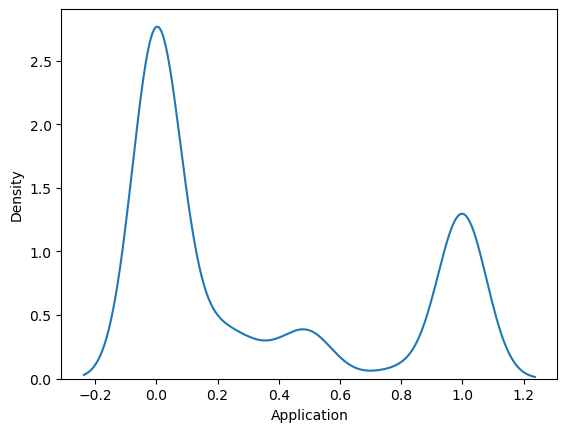

In [24]:
sns.kdeplot(df_clean['Application'])

<AxesSubplot:xlabel='Compute', ylabel='Density'>

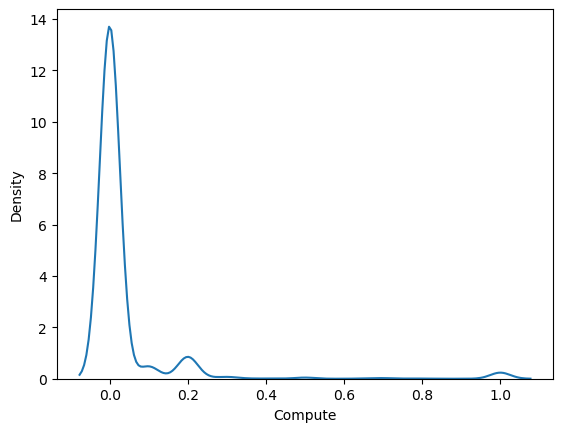

In [25]:
sns.kdeplot(df_clean['Compute'])

The above distrobution graph for 'Compute' is multi-modal at 0 or 2

<AxesSubplot:xlabel='Data Center', ylabel='Density'>

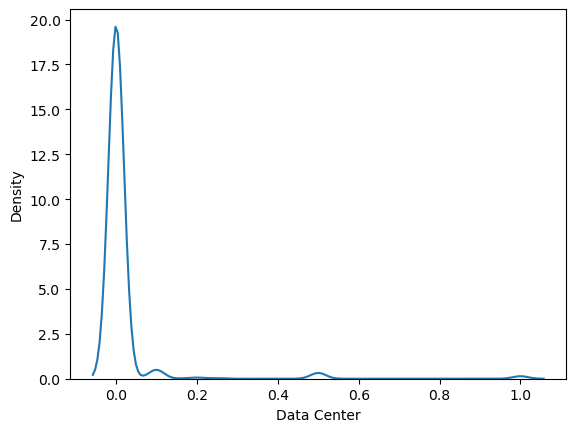

In [26]:
sns.kdeplot(df_clean['Data Center'])

<AxesSubplot:xlabel='Delivery', ylabel='Density'>

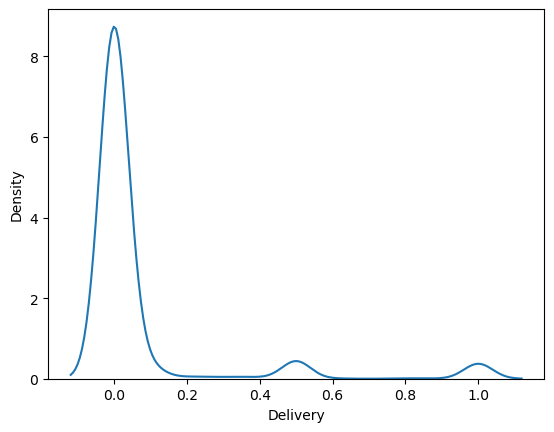

In [27]:
sns.kdeplot(df_clean['Delivery'])

<AxesSubplot:xlabel='End User', ylabel='Density'>

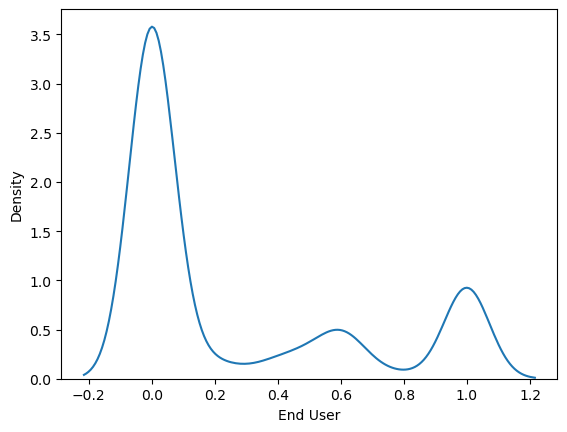

In [28]:
sns.kdeplot(df_clean['End User'])

<AxesSubplot:xlabel='IT Management', ylabel='Density'>

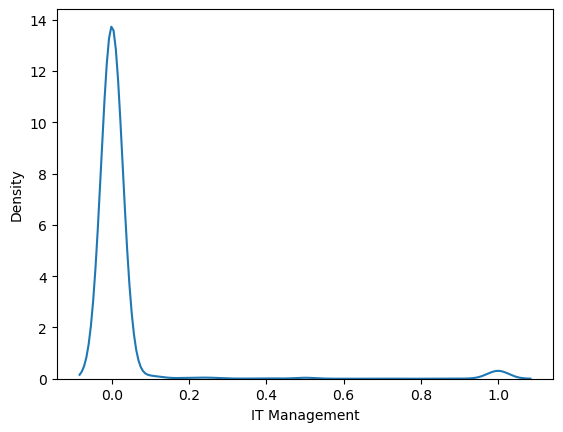

In [29]:
sns.kdeplot(df_clean['IT Management'])

<AxesSubplot:xlabel='Network', ylabel='Density'>

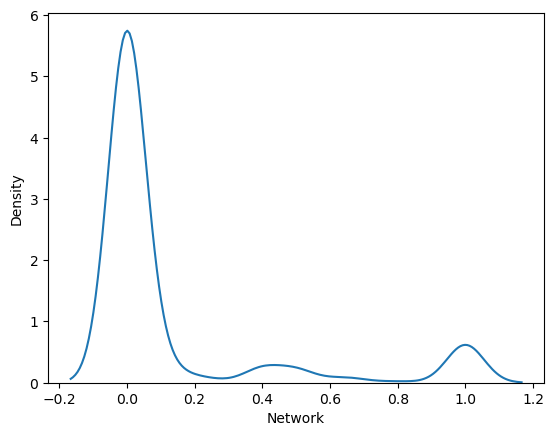

In [30]:
sns.kdeplot(df_clean['Network'])

<AxesSubplot:xlabel='Output', ylabel='Density'>

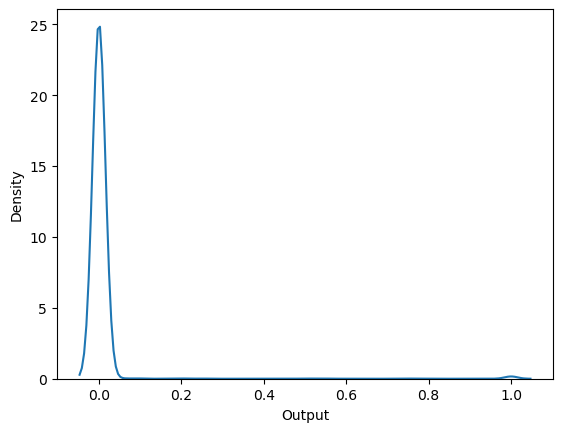

In [31]:
sns.kdeplot(df_clean['Output'])

<AxesSubplot:xlabel='Platform', ylabel='Density'>

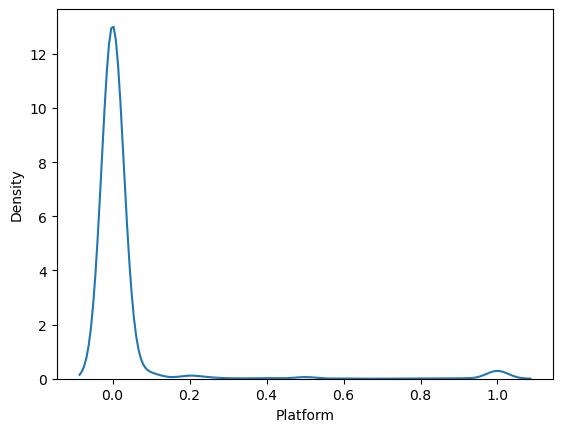

In [32]:
sns.kdeplot(df_clean['Platform'])

<AxesSubplot:xlabel='Security', ylabel='Density'>

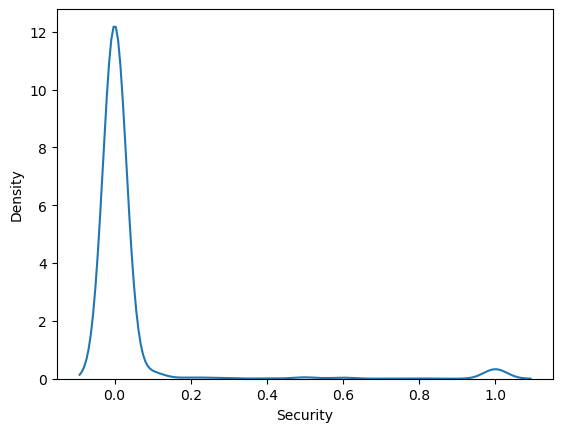

In [33]:
sns.kdeplot(df_clean['Security'])

<AxesSubplot:xlabel='Storage', ylabel='Density'>

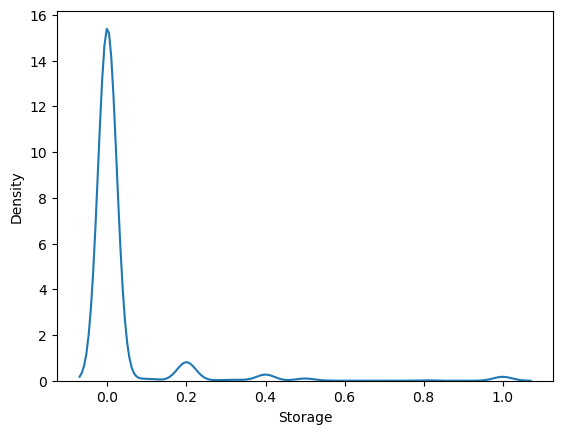

In [34]:
sns.kdeplot(df_clean['Storage'])

<AxesSubplot:xlabel='Other/Non-IT', ylabel='Density'>

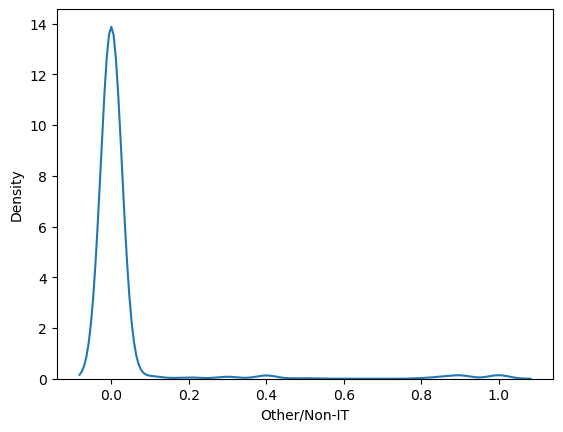

In [35]:
sns.kdeplot(df_clean['Other/Non-IT'])

<AxesSubplot:xlabel='StartYear', ylabel='Density'>

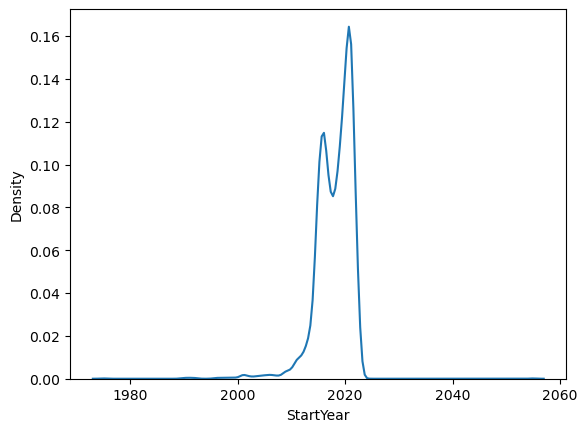

In [36]:
sns.kdeplot(df_clean['StartYear'])

Most contracts start in 2020 and most start in July.

<AxesSubplot:xlabel='StartMonth', ylabel='Density'>

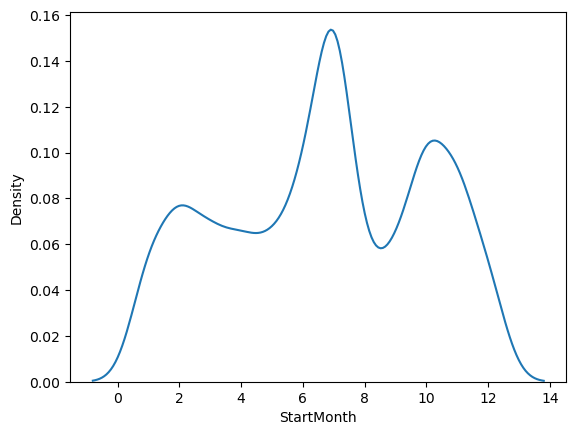

In [37]:
sns.kdeplot(df_clean['StartMonth'])

<AxesSubplot:xlabel='EndYear', ylabel='Density'>

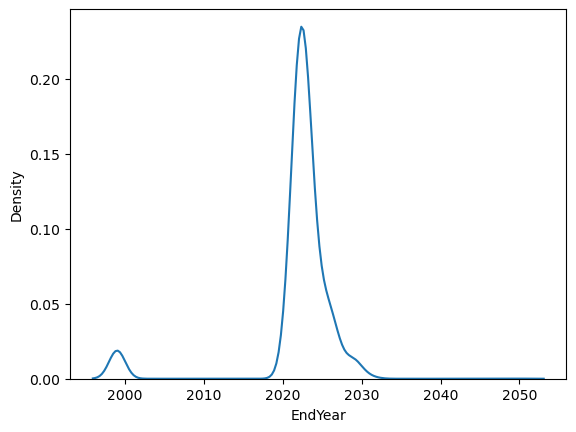

In [38]:
sns.kdeplot(df_clean['EndYear'])

Most 'EndYear' are 2025

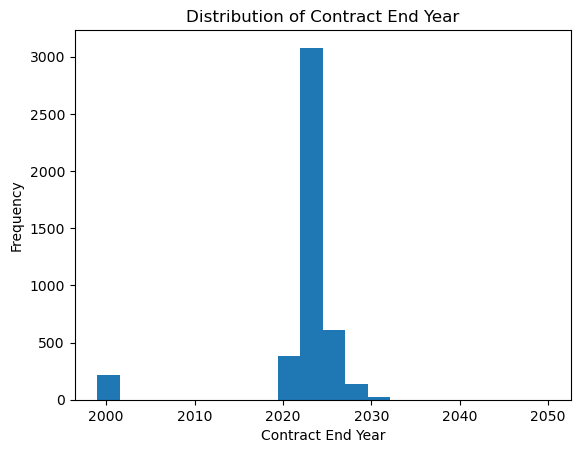

In [39]:
#-- Exploring the density of 'EndYear' and 'Frequency' in a histogram plot --#
plt.hist(df_clean['EndYear'], bins=20)  
plt.xlabel("Contract End Year")
plt.ylabel("Frequency")
plt.title("Distribution of Contract End Year")
plt.show()

#-- The below frequency distrobution of Customer Credit --#

<AxesSubplot:xlabel='EndMonth', ylabel='Density'>

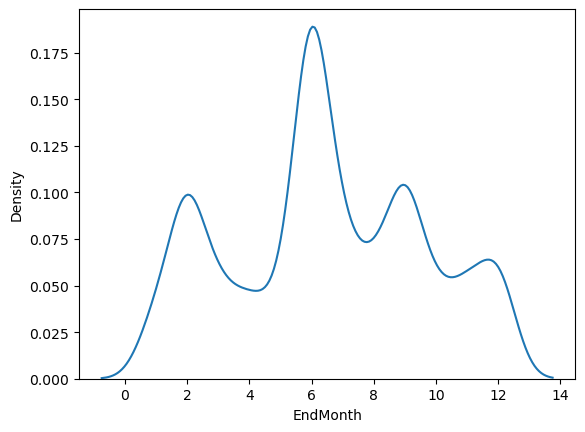

In [40]:
sns.kdeplot(df_clean['EndMonth'])

Most contracts end in June

<AxesSubplot:xlabel='Total Contract Amount', ylabel='Density'>

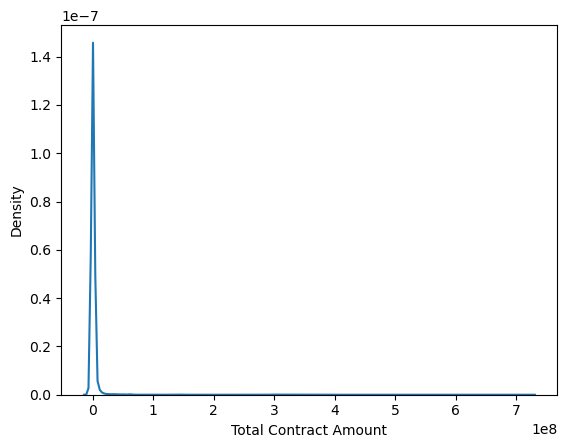

In [41]:
sns.kdeplot(df_clean['Total Contract Amount'])

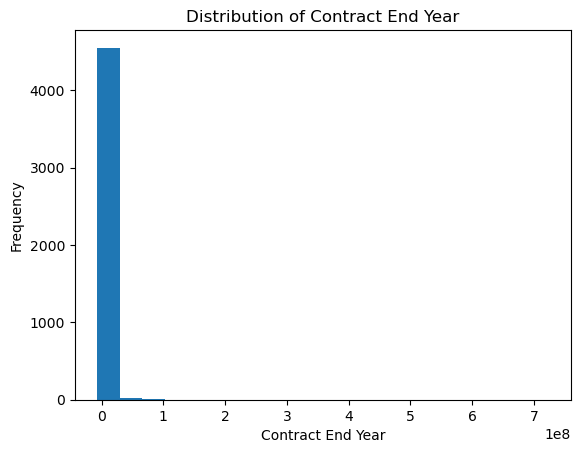

In [42]:
#-- Exploring the density of 'EndYear' and 'Frequency' in a histogram plot --#
plt.hist(df_clean['Total Contract Amount'], bins=20)  
plt.xlabel("Contract End Year")
plt.ylabel("Frequency")
plt.title("Distribution of Contract End Year")
plt.show()

#-- The below frequency distrobution of Customer Credit --#

<AxesSubplot:xlabel='Cooperative Purchase\n(Yes/No)', ylabel='Density'>

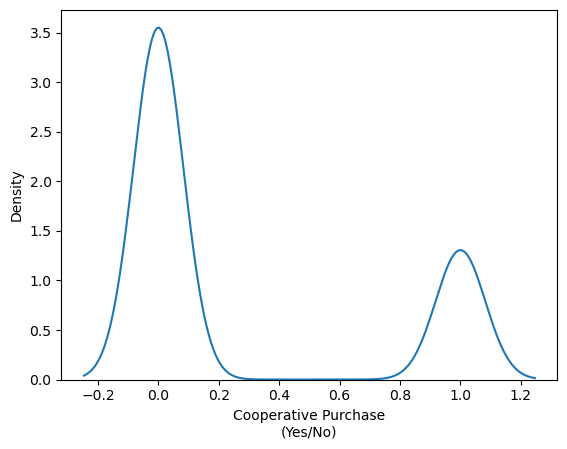

In [43]:
sns.kdeplot(df_clean['Cooperative Purchase\n(Yes/No)'])

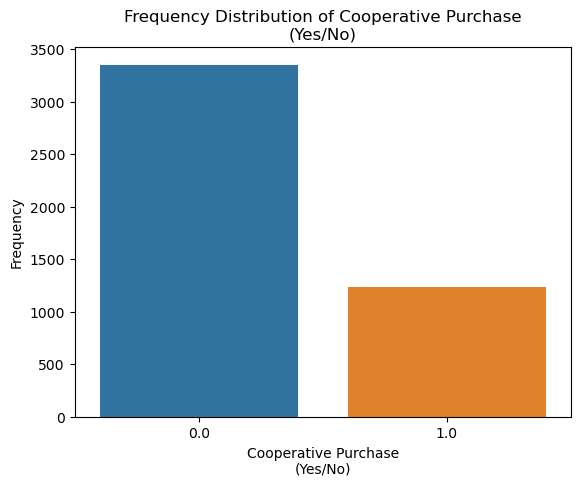

In [44]:
column_name = 'Cooperative Purchase\n(Yes/No)'
#-- Creating a bar plot --#
sns.countplot(x=column_name, data=df_clean)
#-- Set plot labels and title --#
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Frequency Distribution of ' + column_name)
#-- Show the plot --#
plt.show()

The above histogram indicates that most contracts awarded at not part of a cooperative-purchcase.

# Bivaraite Exploration (two variables at the same time)

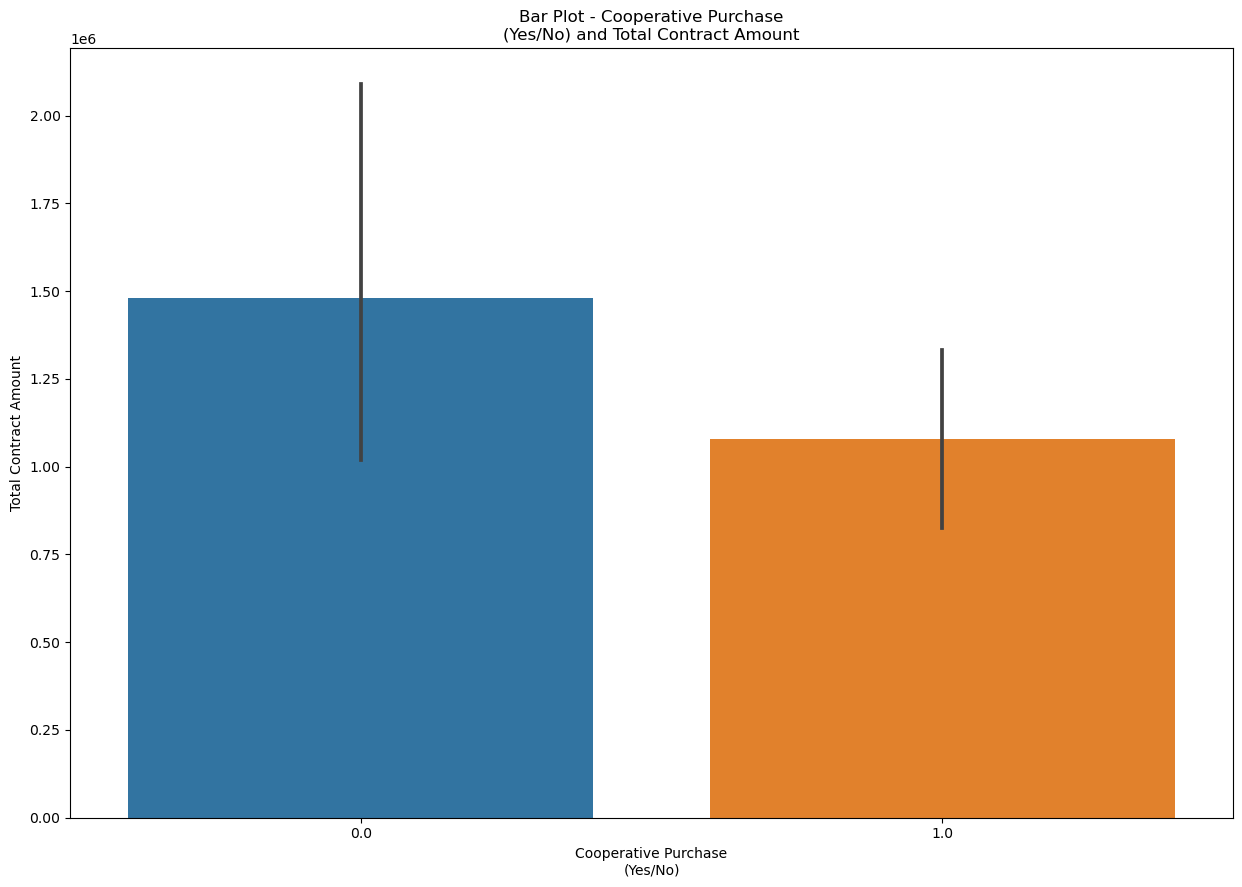

In [80]:
#-- Barplot of the indicating the frequency of 'Total Contract Amount'  --#
plt.figure(figsize=(15, 10))
sns.barplot(data = df_clean, y="Total Contract Amount", x= 'Cooperative Purchase\n(Yes/No)')
plt.title('Bar Plot - Cooperative Purchase\n(Yes/No) and Total Contract Amount')
plt.show()

The above graph indicates that the majority of 'Total Contract Amount' is higher in for Non-Cooperative purchase vs Cooperative. Cooperative purchases, while small in frequency, still get a higher ratio of 'Total Contract Amount'.

Additionally, (graph below) when comparing 'total_time', cooperative purchase contracts has significantly more contract time. 

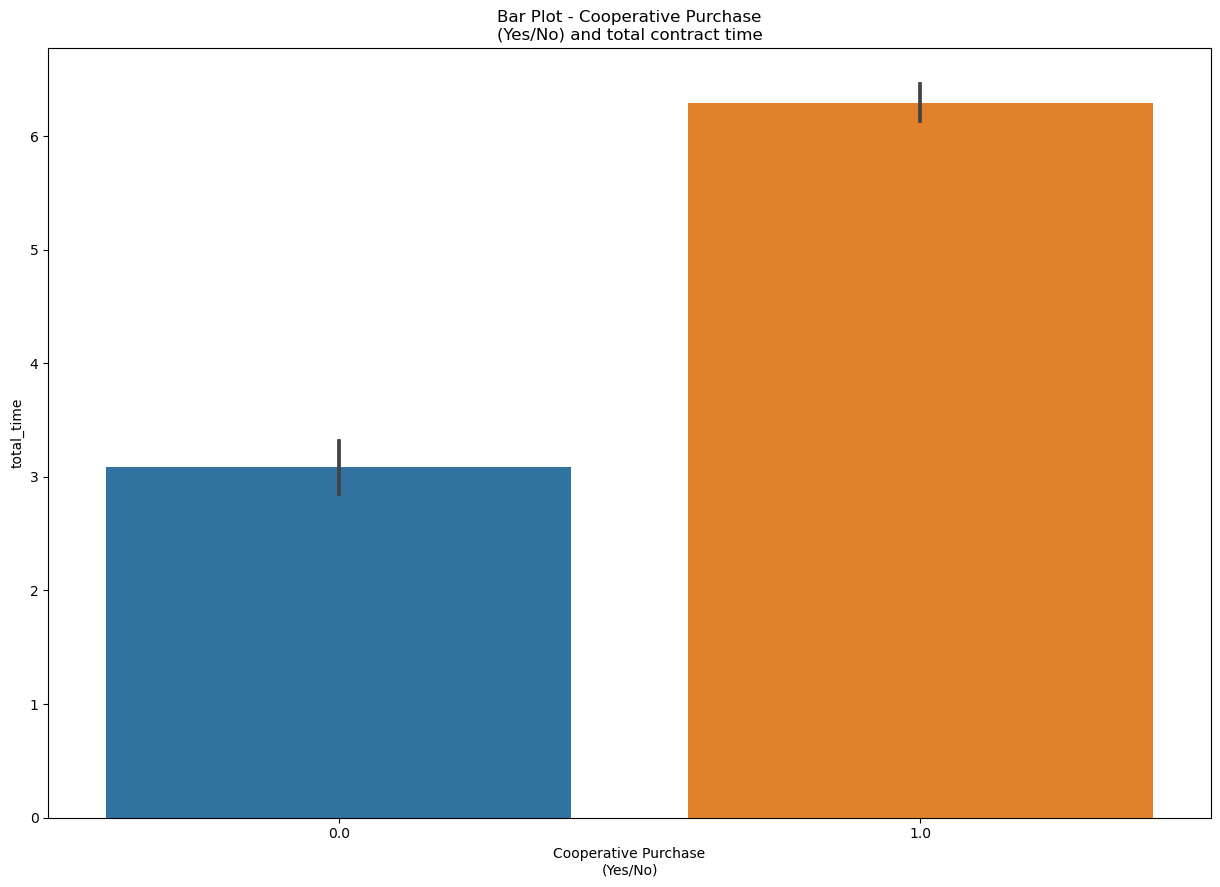

In [79]:
#-- Barplot of the indicating the frequency of 'total_time'  --#
plt.figure(figsize=(15, 10))
sns.barplot(data = df_clean, y="total_time", x= 'Cooperative Purchase\n(Yes/No)')
plt.title('Bar Plot - Cooperative Purchase\n(Yes/No) and total contract time')
plt.show()

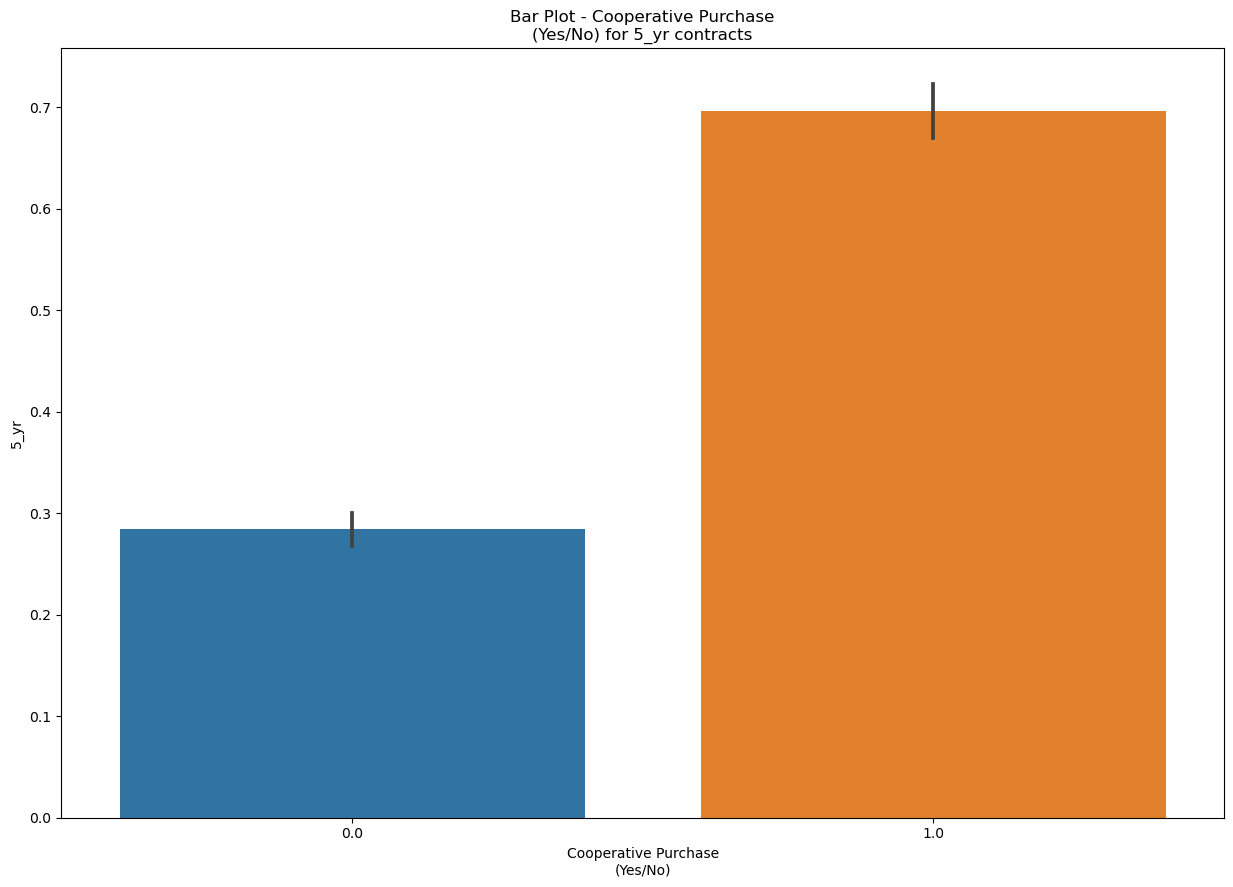

In [78]:
#-- Barplot of the indicating the frequency of '5_yr' contracts that are Cooperative purchases  --#
plt.figure(figsize=(15, 10))
sns.barplot(data = df_clean, y="5_yr", x= 'Cooperative Purchase\n(Yes/No)')
plt.title('Bar Plot - Cooperative Purchase\n(Yes/No) for 5_yr contracts')
plt.show()

According to the above graph, the majority of '5_yr' contracts are awarded to Cooperative pruchases. 

While the graph below show the opposite is true when it comes to '10_yr' contracts. Most '10_yr' contracts are being awarded to non-cooperative purchases.

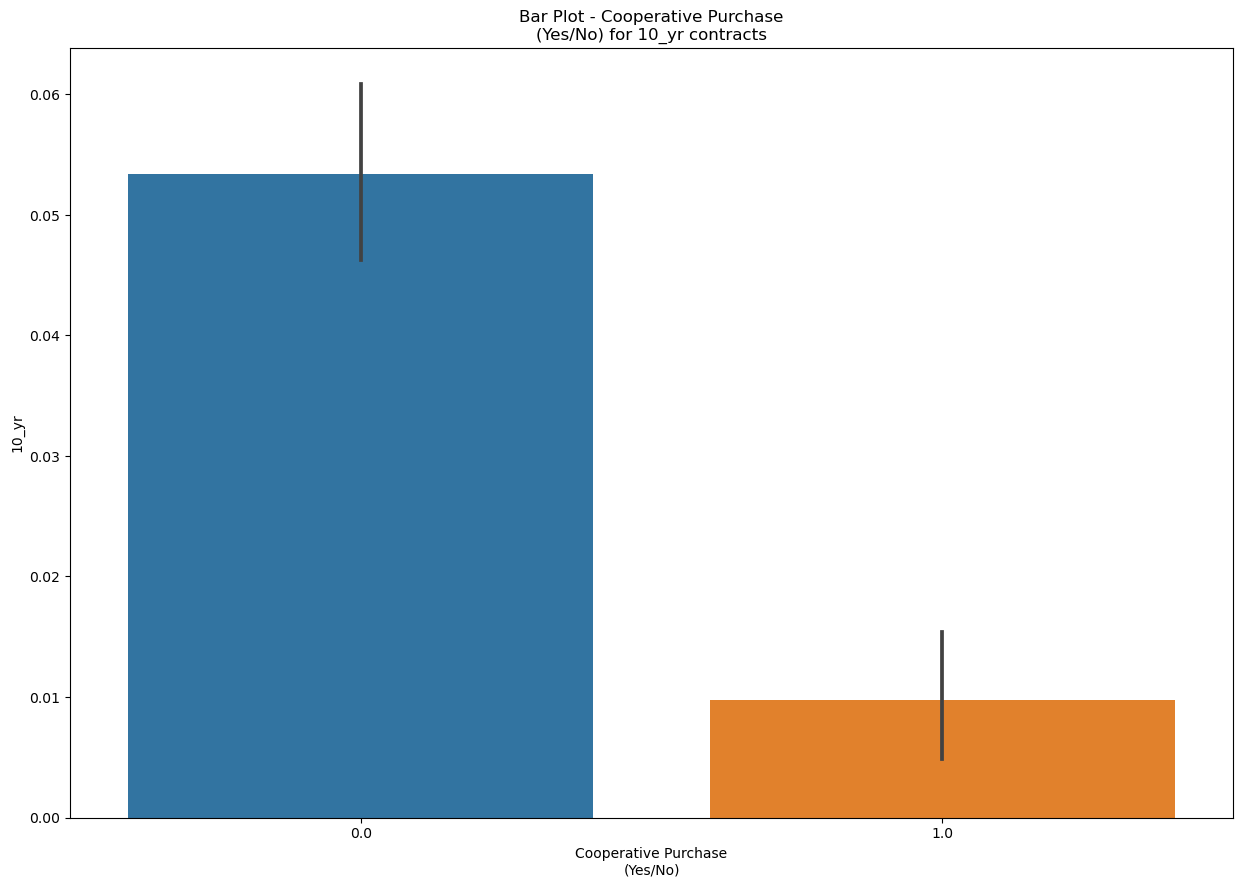

In [76]:
#-- Barplot of the indicating the frequency of '10_yr' contracts that are Cooperative vs Non-Cooperative purchase contracts  --#
plt.figure(figsize=(15, 10))
sns.barplot(data = df_clean, y="10_yr", x= 'Cooperative Purchase\n(Yes/No)')
plt.title('Bar Plot - Cooperative Purchase\n(Yes/No) for 10_yr contracts')
plt.show()

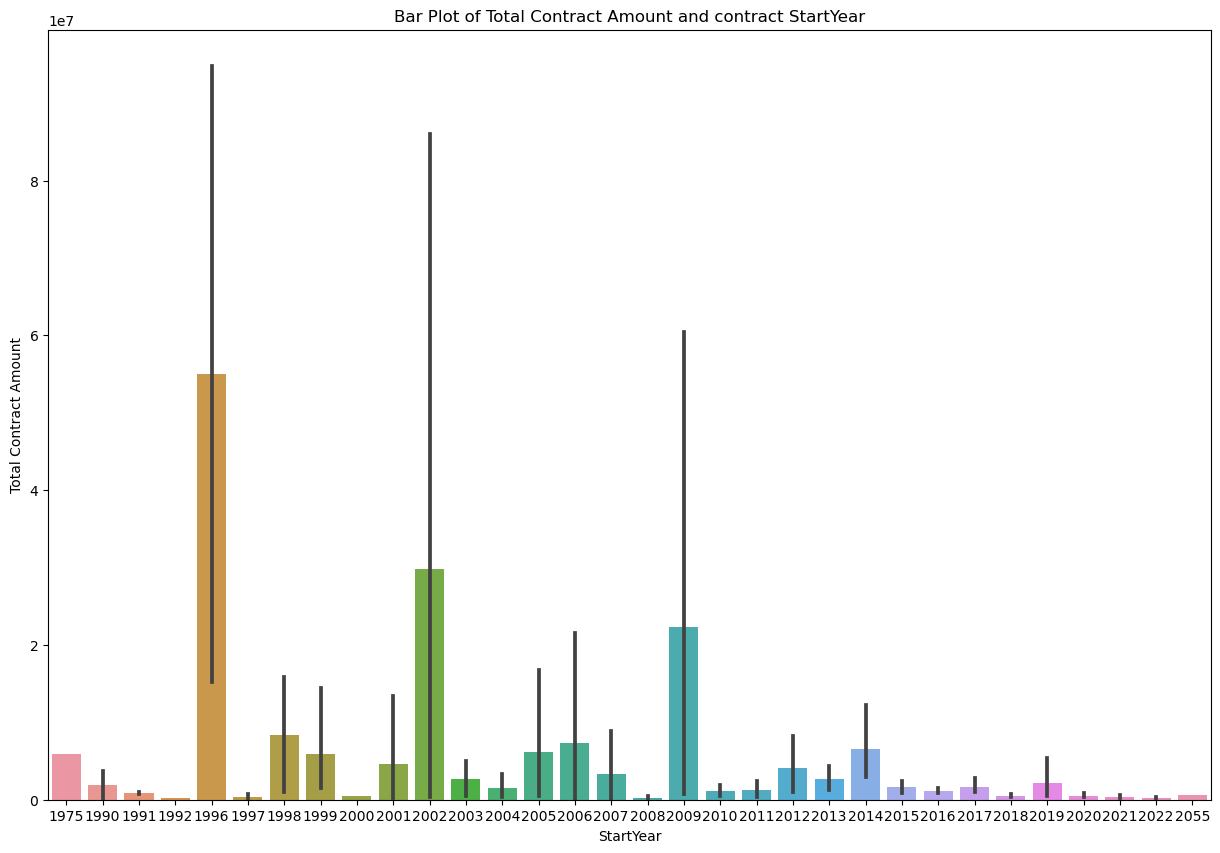

In [82]:
#-- Barplot of the indicating the frequency of 'Total Contract Amount' per StartYear --#
plt.figure(figsize=(15, 10))
sns.barplot(data = df_clean, y="Total Contract Amount", x= 'StartYear')
plt.title('Bar Plot of Total Contract Amount and contract StartYear')
plt.show()

The above bar graph indicates that 1996 was the year the state awarded the most lucrative contracts. Then again in 2002 and 2009. What is interesting is, even though 2020-21 are the most common start years in the density plot for univariate exploration, 1996 had a significantly higher amounts awarded by the state.  

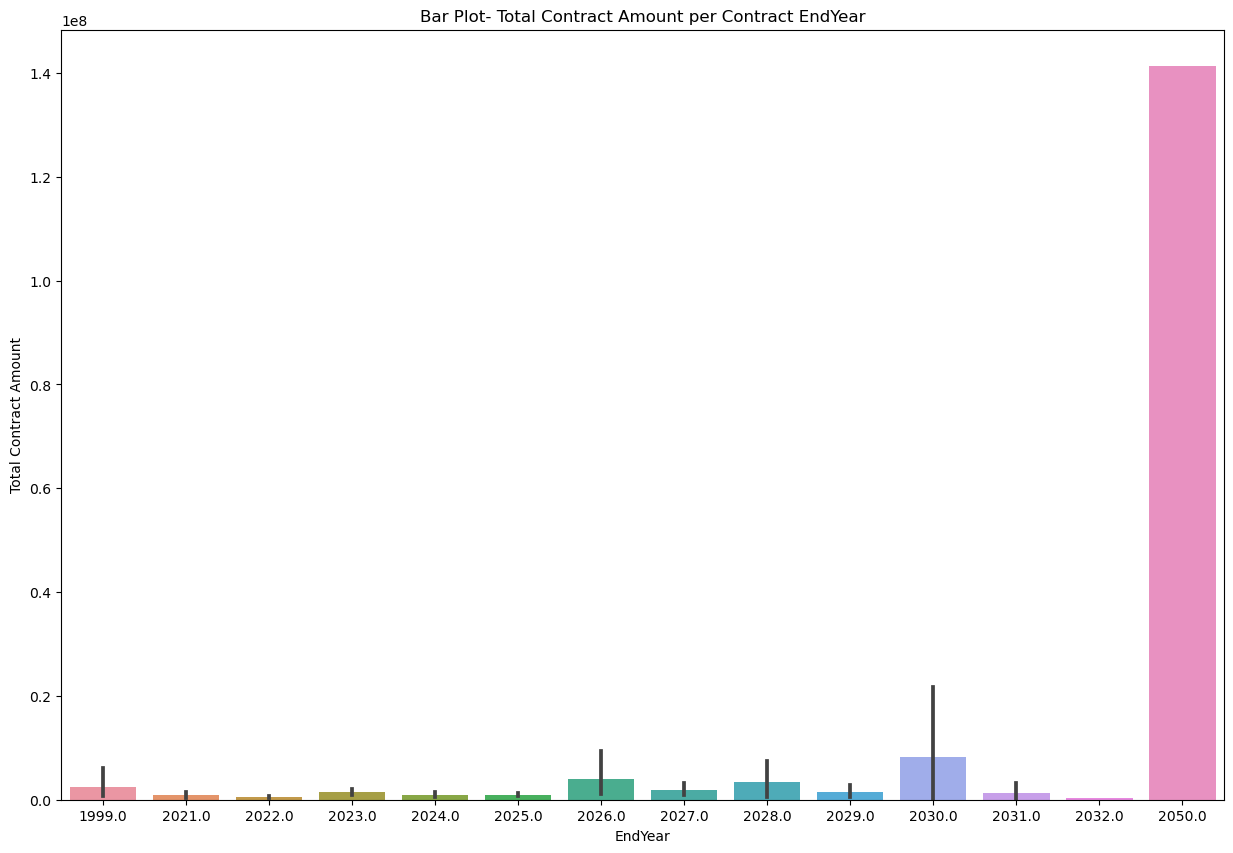

In [83]:
#-- Barplot of the indicating the frequency of 'Total Contract Amount' per 'EndYear' --#
plt.figure(figsize=(15, 10))
sns.barplot(data = df_clean, y="Total Contract Amount", x= 'EndYear')
plt.title('Bar Plot- Total Contract Amount per Contract EndYear')
plt.show()

According to the above graph, the contracts with the most money end in 2050.

# Exploring Washington State top contracting agencies

# Which Washington State agencies issue the largest IT contracts by 'Total Contract Amount'?

In [51]:
top_30_agencies = df_clean.groupby('AgencyName')['Total Contract Amount'].sum().nlargest(30)
print(top_30_agencies)

AgencyName
University of Washington (UW)                                                        1.606918e+09
State Health Care Authority (HCA)                                                    9.314517e+08
Department of Social and Health Services (DSHS)                                      6.882547e+08
Transportation, Department of (DOT) Includes FMSIB and Tranpsportation Commission    3.822496e+08
Office of Financial Management                                                       2.640517e+08
Consolidated Technology Services (CTS)                                               2.602512e+08
Enterprise Services, Dept of (DES)                                                   2.447627e+08
Department of Revenue (DOR)                                                          2.037777e+08
Department of Labor and Industries (L&I)                                             1.863148e+08
Employment Security Department (ES)                                                  1.490796e+08
Departmen

# Which Agencies have the longest contracts?

In [52]:
top_30_agencies = df_clean.groupby('AgencyName')['total_time'].sum().nlargest(30)
print(top_30_agencies)

AgencyName
University of Washington (UW)                                                        1581.0
Transportation, Department of (DOT) Includes FMSIB and Tranpsportation Commission    1497.0
Office of Financial Management                                                        815.0
Department of Revenue (DOR)                                                           683.0
Department of Labor and Industries (L&I)                                              678.0
Liquor and Cannabis Board (LCB)                                                       588.0
Consolidated Technology Services (CTS)                                                543.0
Central Washington University (CWU)                                                   477.0
Spokane Community College - District 17 (SCCD-17)                                     463.0
Washington State Patrol (WSP)                                                         451.0
Eastern Washington University (EWU)                                  

# Which state agencies issue the most 10 year contracts?

In [53]:
Long_Contract_Agencies = df_clean.groupby('AgencyName')['10_yr'].sum().nlargest(30)
print(Long_Contract_Agencies)

AgencyName
Transportation, Department of (DOT) Includes FMSIB and Tranpsportation Commission    40
University of Washington (UW)                                                        27
Department of Revenue (DOR)                                                          22
Department of Labor and Industries (L&I)                                             14
Washington Pollution Liability Insurance Program (PLI)                                8
Green River College (GRC)                                                             7
Office of Financial Management                                                        6
Consolidated Technology Services (CTS)                                                5
Western Washington University (WWU)                                                   5
Department of Corrections (DOC)                                                       4
Department of Social and Health Services (DSHS)                                       4
Liquor and Cannabis B

 # Which agencies issues the most 5_yr contracts? 

In [54]:
fiveyear_Contract_Agencies = df_clean.groupby('AgencyName')['5_yr'].sum().nlargest(30)
print(fiveyear_Contract_Agencies)

AgencyName
Transportation, Department of (DOT) Includes FMSIB and Tranpsportation Commission    167
University of Washington (UW)                                                        138
Consolidated Technology Services (CTS)                                                72
Department of Revenue (DOR)                                                           70
Department of Social and Health Services (DSHS)                                       67
Office of Financial Management                                                        66
Department of Labor and Industries (L&I)                                              63
Enterprise Services, Dept of (DES)                                                    52
Washington State Patrol (WSP)                                                         48
Spokane Community College - District 17 (SCCD-17)                                     45
Central Washington University (CWU)                                                   42
Clover Par

# Who are the top hired tech contractors?

In [55]:
top_30_contracts = df_clean.groupby('Contractor Name')['Total Contract Amount'].sum().nlargest(30)
print(top_30_contracts)

Contractor Name
CNSI                                                              7.229309e+08
Microsoft                                                         3.968108e+08
Bridge Data Solutions                                             3.043097e+08
WORKDAY INC                                                       2.324772e+08
SHI                                                               2.012630e+08
Fast Enterprises LLC                                              1.880918e+08
CDW Government, Inc.                                              1.806682e+08
Cerner Corporation - SWV0175200                                   1.455571e+08
DELL                                                              1.166801e+08
Dell                                                              1.097293e+08
Epic Systems Corp                                                 9.535767e+07
Delloitte Consulting, LLP                                         9.340141e+07
Electronic Transaction Consult      

# Which contractor has the longest contract?

In [87]:
top_30_contracts = df_clean.groupby('Contractor Name')['total_time'].sum().nlargest(30)
print(top_30_contracts)

Contractor Name
SHI                                                      788.0
Verizon Wireless Services LLC.                           661.0
Dell                                                     485.0
Carahsoft Technology Corporation                         375.0
CDW Government, Inc.                                     369.0
Microsoft                                                351.0
HEWLETT-PACKARD ENTERPRISE COMPANY                       344.0
HP INC.                                                  233.0
DELL                                                     202.0
ENVIRONMENTAL SYSTEMS RESEARCH INSTITUTE, INC. (ESRI)    200.0
Centurylink Inc.                                         191.0
MAGNA5, LLC                                              185.0
SAS                                                      172.0
AT&T MOBILITY                                            159.0
Lenovo                                                   151.0
Apple, Inc.                            

# Which contractors have the most 10 year contracts?

In [57]:
ten_yr_contracts = df_clean.groupby('Contractor Name')['10_yr'].sum().nlargest(30)
print(ten_yr_contracts)

Contractor Name
Open Text Inc                       9
Microsoft                           6
SAS                                 5
University of Washington            4
938289527                           3
Comcast                             3
Earthsoft, Inc.                     3
Apple, Inc.                         2
Attachmate Corporation              2
Cerner Corporation - SWV0175200     2
Kalos Inc                           2
Oracle                              2
PACIFIC NW GIGAPOP                  2
Pitney Bowes                        2
SHI                                 2
Software AG USA, Inc.               2
Technology Unlimited Inc.           2
Unisys Corporation                  2
Verizon Wireless Services LLC.      2
AASHTO                              1
ADL Data Systems                    1
ALERE INFORMATICS INC               1
APPEXTREMES LLC                     1
ARIBA¬†INC¬†214910                  1
American Digital Cartography Inc    1
American Management Services/CGI  

# Which Companies have the most '5_yr' contracts 

In [58]:
#-- Below is a count of the number of 5 year contracts awarded to customers --#
five_yr_contracts = df_clean.groupby('Contractor Name')['5_yr'].sum().nlargest(30)
print(five_yr_contracts)

Contractor Name
SHI                                                      92
Verizon Wireless Services LLC.                           66
Dell                                                     64
CDW Government, Inc.                                     52
HEWLETT-PACKARD ENTERPRISE COMPANY                       45
Microsoft                                                41
Carahsoft Technology Corporation                         38
HP INC.                                                  28
DELL                                                     25
MAGNA5, LLC                                              20
Lenovo                                                   19
CISCO SYSTEMS, INC.                                      18
ENVIRONMENTAL SYSTEMS RESEARCH INSTITUTE, INC. (ESRI)    17
Right Systems                                            17
AT&T MOBILITY                                            16
Apple, Inc.                                              15
OFFICE DEPOT            

In [59]:
#-- Below is a count of the number of Cooperative Purchase contracts awarded to customers --#
Co_Ops = df_clean.groupby('Cooperative Purchase\n(Yes/No)')['5_yr'].sum()
print(Co_Ops)

Cooperative Purchase\n(Yes/No)
0.0    953
1.0    858
Name: 5_yr, dtype: int64


# Now reducing the dataset

In [62]:
df_clean['AgencyNumber'].astype(int)

0        75
1        75
2        75
3        75
4        75
       ... 
4622    305
4623    305
4624    305
4625    305
4626    305
Name: AgencyNumber, Length: 4586, dtype: int64

# Now creating a new data frames to explore the contract services rendered

In [64]:

#-- Yeilded 20% accuracy predicting 'total_time' for ensemble methods --#
#df_services = df_clean[['Application','Compute','Data Center','Delivery','End User','IT Management','Network','Output','Platform','Security','Storage','Other/Non-IT','Total Contract Amount','total_time']].copy()

#-- Yeilding 73% accuracy predicting 'total_time, when adding '10_yr' and '5_yr' contracts for ensemble methods--#
#df_services = df_clean[['Application','Compute','Data Center','Delivery','End User','IT Management','Network','Output','Platform','Security','Storage','Other/Non-IT','total_time','10_yr','5_yr']].copy()

#-- Yeilding 0% accuracy predicting 'Total Contract Amount' for ensemble methods --#
df_services = df_clean[['Cooperative Purchase\n(Yes/No)','Application','Compute','Data Center','Delivery','End User','IT Management','Network','Output','Platform','Security','Storage','Other/Non-IT','total_time','10_yr','5_yr','Total Contract Amount']].copy()


In [65]:
#-- Removing an inf or nans --#
df_services = df_services.dropna()  # Drops rows with any NaN values
df_services = df_services[~df_services.isin([np.inf, -np.inf]).any(1)] 

In [66]:
#df_services['AgencyNumber'].astype(int)

In [67]:
non_numeric_values = df_services[~df_clean['AgencyNumber'].astype(str).str.isdigit()]
print(non_numeric_values)

Empty DataFrame
Columns: [Cooperative Purchase
(Yes/No), Application, Compute, Data Center, Delivery, End User, IT Management, Network, Output, Platform, Security, Storage, Other/Non-IT, total_time, 10_yr, 5_yr, Total Contract Amount]
Index: []


<AxesSubplot:title={'center':'Pearson Correlation of IT Contract Features'}>

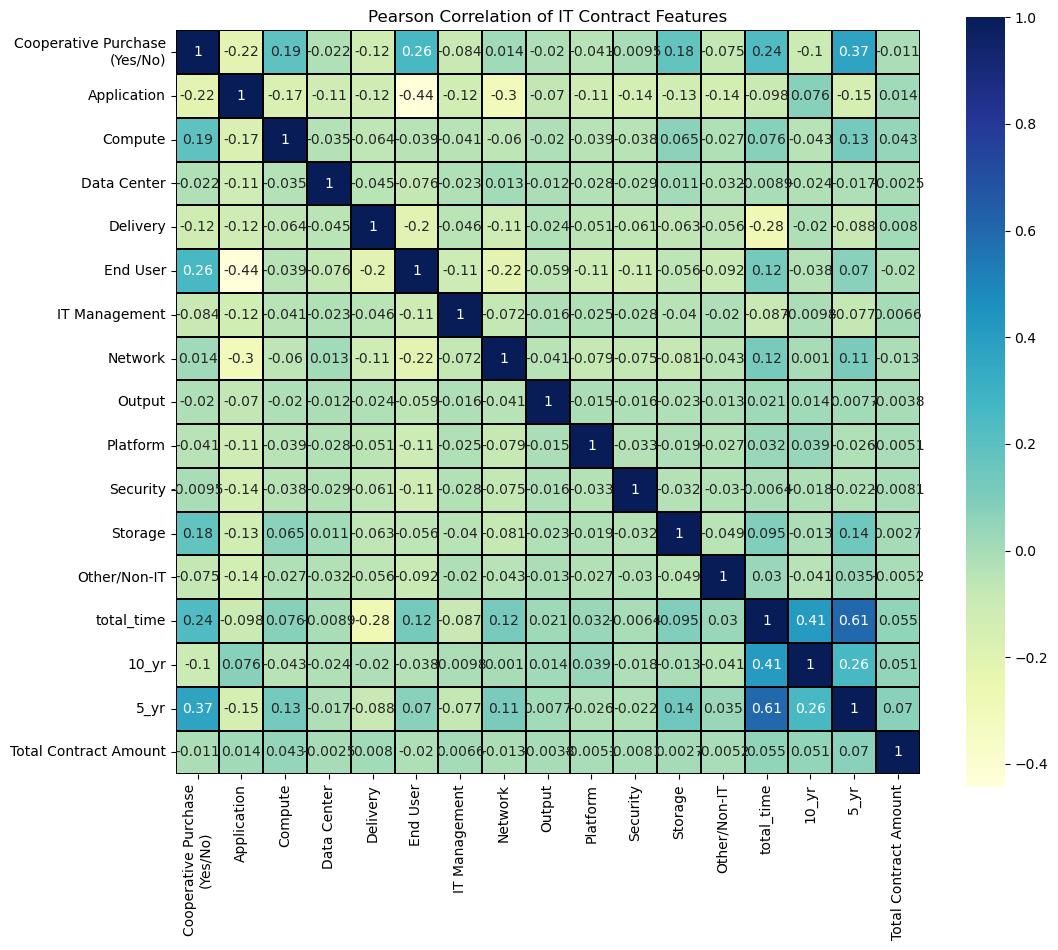

In [84]:
#-- Exploring for correlations between varaibles with matplotlib --#
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of IT Contract Features')
 
# Draw the heatmap using seaborn
sns.heatmap(df_services.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

The above correlation matrix indicates that categories 'End_User' and 'Network' are correlated with 'total_time' at 12%

Cooperative Purchase (Yes) is associate with the following attributes along with a percentile: Compute (19%), End User (26%) , Storage (18%), and '5_yr' contracts (37%).
It also appears that '5_yr' contracts are positively correlated with 'Compute', 'End User', 'Network', 'Storage'. 

# Now conducting exploritory Machine Learning Models: Starting with Prinicipal Component Analysis for demensionality reduction  

In [69]:
#-- Scaling the data --#
#-- Create the object --#
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_services)

In [70]:
#-- Calculate the mean and Standard deviation --#
#-- Conducting PCA --#
#-- Calculating Eigenvectors and eigenvalues of Cov matrix --#
mean_vec = np.mean(df_scaled, axis=0)
cov_mat = np.cov(df_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#-- Create a list of (eigenvalue, eigenvector) tuples --#
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

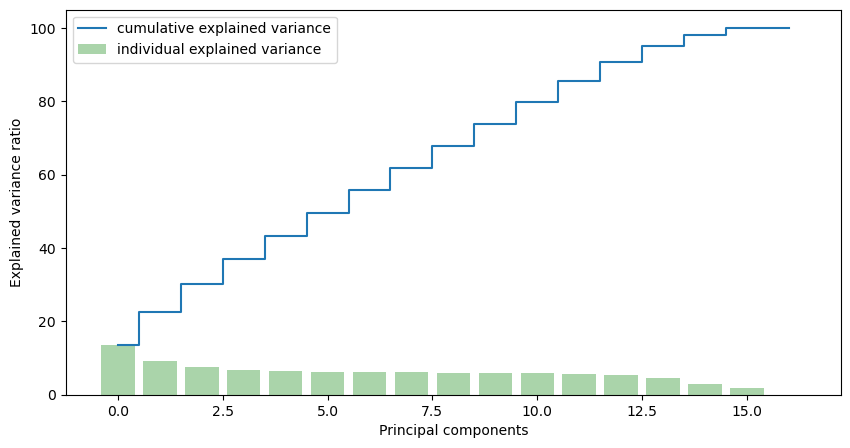

In [71]:
#-- Sort from high to low --#
eig_pairs.sort(key = lambda x: x[0], reverse= True)
 
#-- Calculation of Explained Variance from the eigenvalues --#
tot = sum(eig_vals)
#-- Individual explained variance --#
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
#-- Cumulative explained variance --#
cum_var_exp = np.cumsum(var_exp)
 
#-- Plot out the variances superimposed --#
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

According to the above graph, the variance of the individual Principal Components are about equal in variance. 
The below graph will attempt to visually asses an 'elbow' in the PCs.

Text(0.5, 1.0, 'K-means with PCA clustering ')

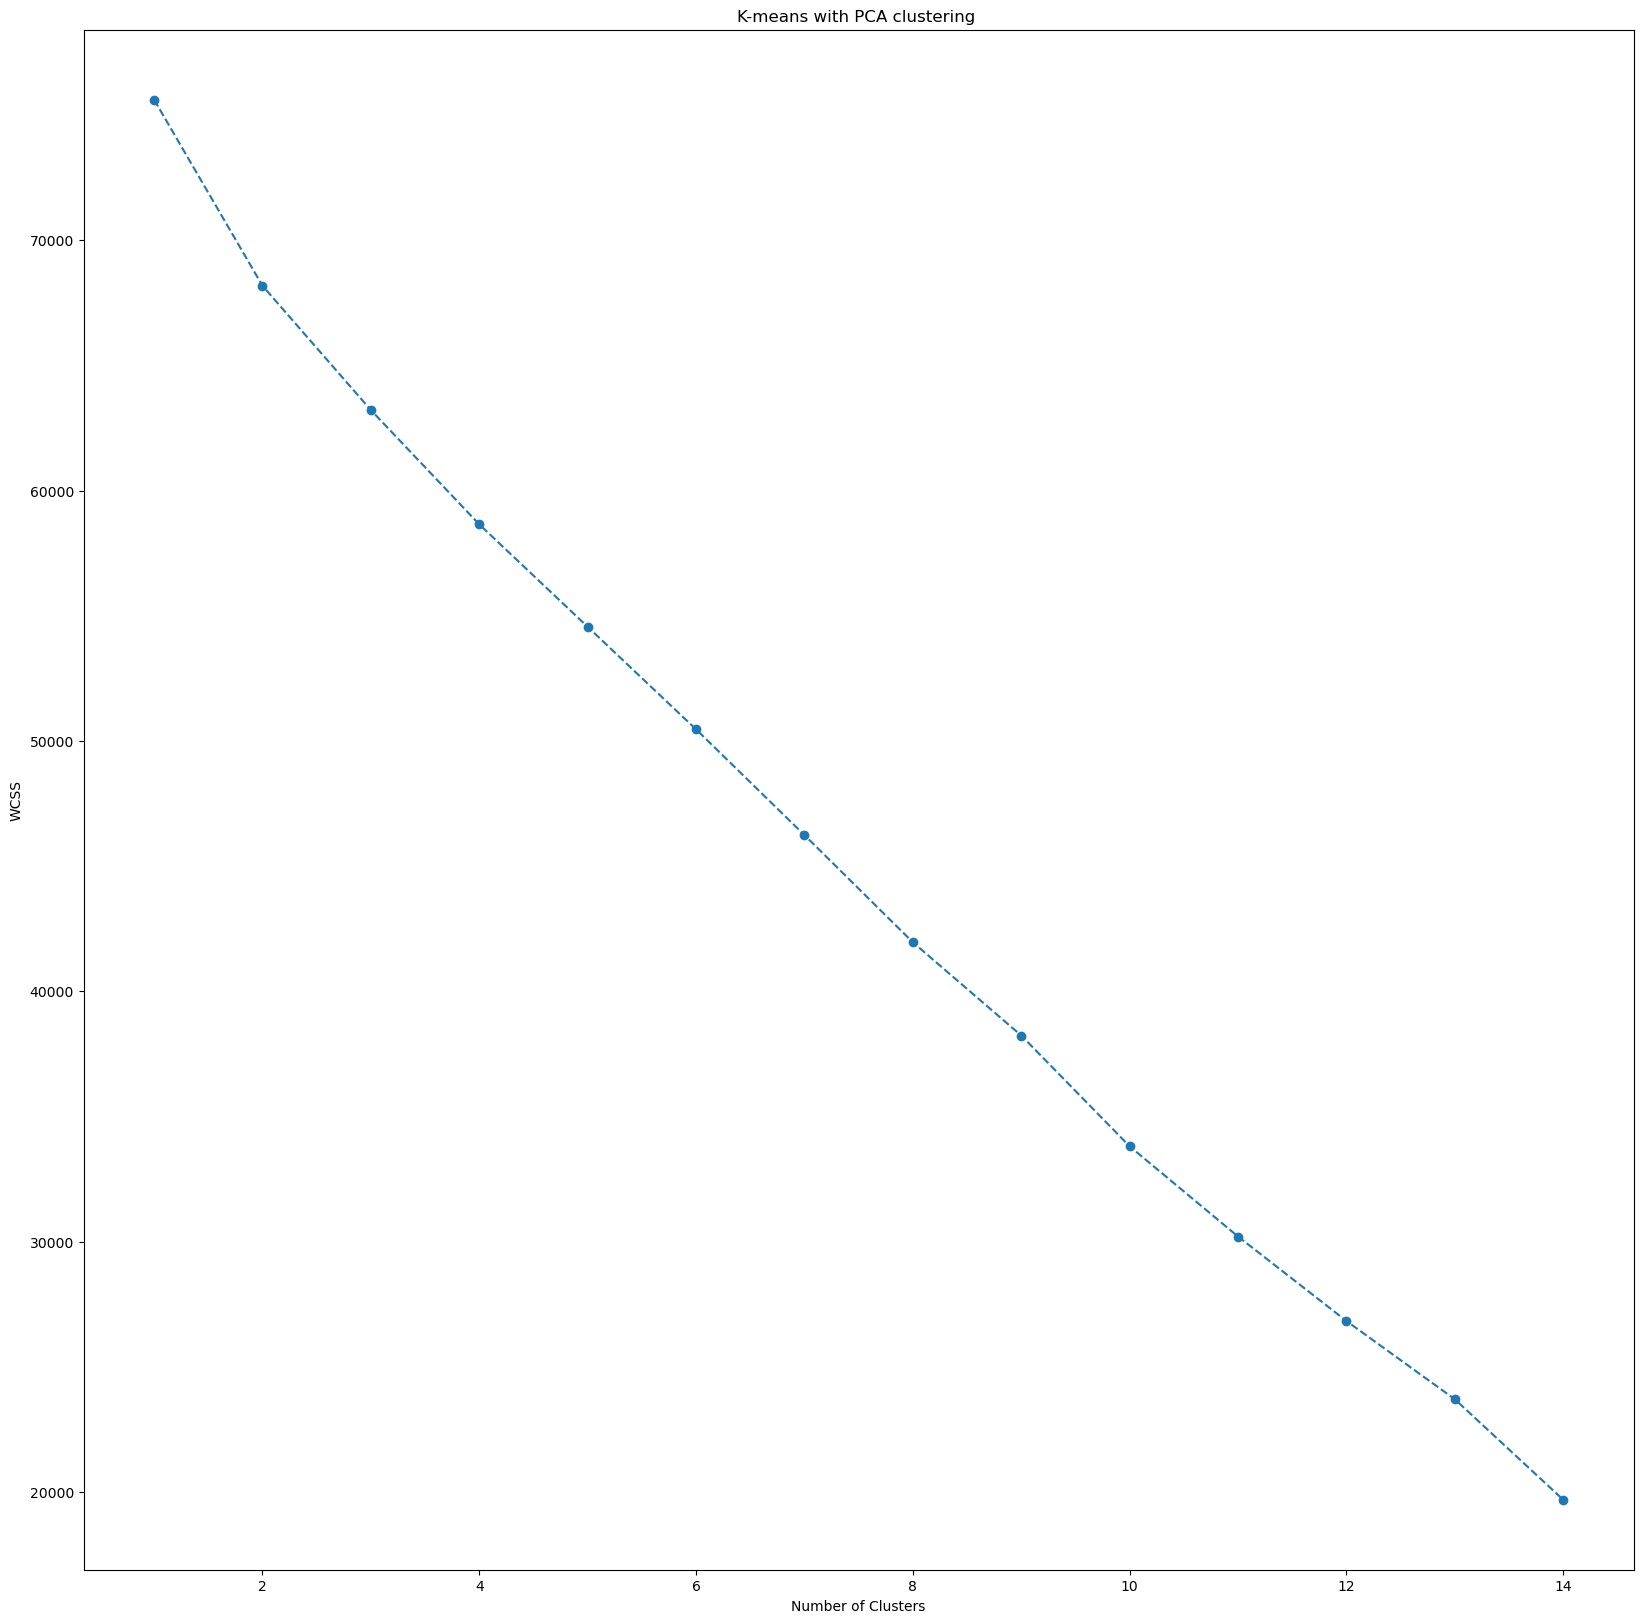

In [72]:
#-- Determining the number of clusters with the Elbow Method --#
#-- Kmeans clustering with PCA --#
wcss = [] #-- sum of squares of distances of datapoints --#
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans_pca.fit(df_scaled)
    wcss.append(kmeans_pca.inertia_)
 
#-- Now plotting the Elbow Graph --#
plt.figure(figsize = (20,20))
plt.plot(range(1,15), wcss, marker ='o', linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering ')


The above PCA output indicates no distinct "elbow" for a visual determination for the ideal number of PCs that capture the majority of variance between the variables. No clear cutt-off for the Kaiser Criterion; therefore, over 75% of the variance is almost equally distributed throughout all 14 Principal Components.

# Now conducting cluster analysis to explore groupings of residuals for visual indicators.

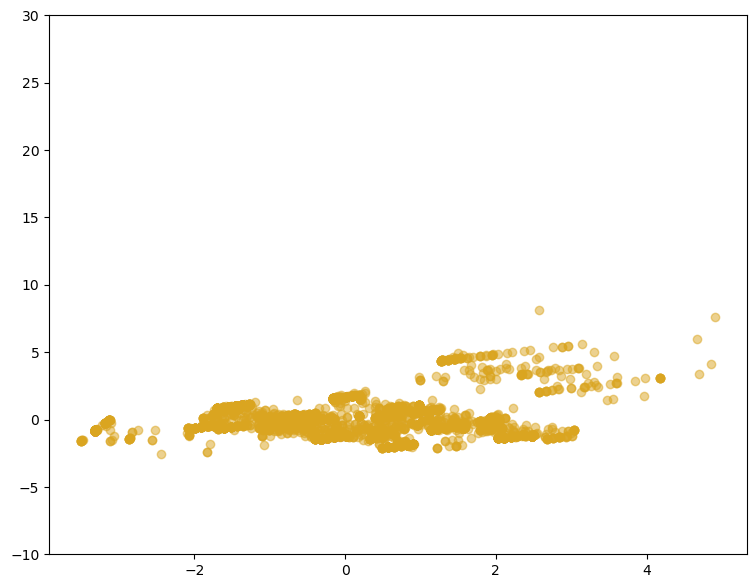

In [73]:
#-- Exploring how the data clusters when transformed with PCA and ‘k’ =1 --#

pca = PCA(n_components=15)

pca_kmeans = pca.fit_transform(df_scaled)

plt.figure(figsize = (9,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,1], c='goldenrod',alpha=0.5)

plt.ylim(-10,30)

plt.show()

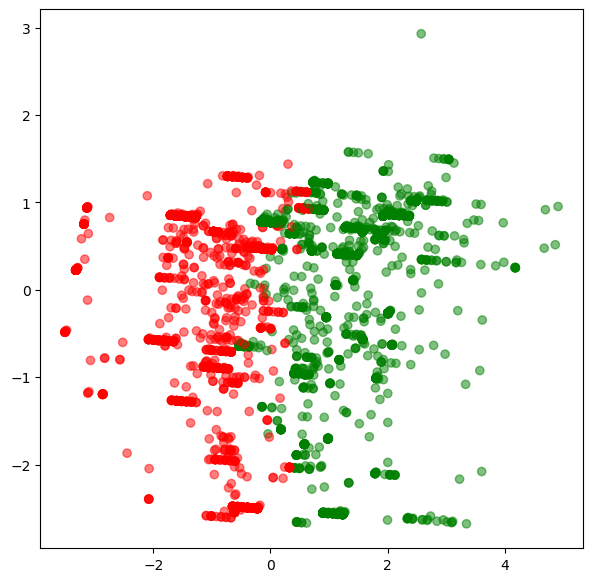

In [74]:
#-- Now running KMeans with 2 clusters --#

kmeans_pca = KMeans(n_clusters =2, init = 'k-means++', random_state = 42)

#-- Kmeans with two clusters --#

#-- Compute cluster centers by fitting the data to the model and predict cluster indices --#

X_clustered = kmeans_pca.fit_predict(pca_kmeans)

#-- Define our own color map--#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,2], c= label_color, alpha=0.5) 

plt.show()

The above visualization indicates that a divide is happening around the '0' mark on the 'y' axis. 

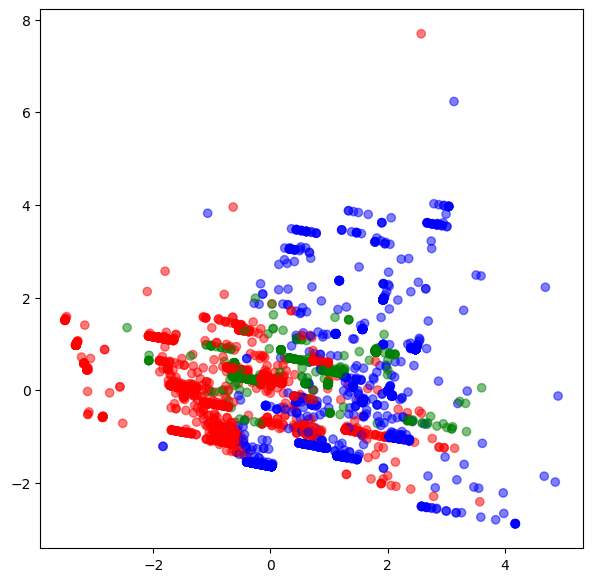

In [75]:
#-- Now setting  'k' = 3 clusters --#

kmeans = KMeans(n_clusters=3)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

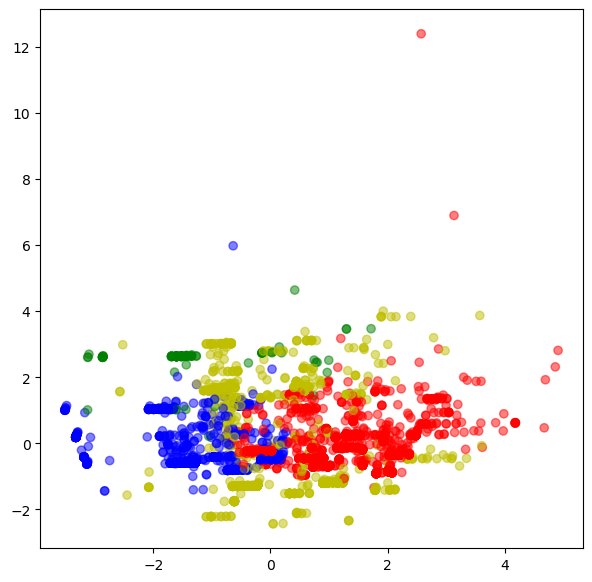

In [76]:
#-- Now setting 'k' to 4 clusters --#

kmeans = KMeans(n_clusters=4)

#-- Compute cluster centers and predict cluster indices --#

X_clustered = kmeans.fit_predict(pca_kmeans)

#-- Define the color map --#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter diagram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,4], c= label_color, alpha=0.5) 

plt.show()

As more clusters are added, the groups tighten up and begin to exhibit more distinct patterns in lines and cube shapes

# Now running Random Forrest Regressor to predict "Total Contract Amount"

In [73]:
#-- Sperating the dataframe into two 'X' = all variables minus the target variable --#
#-- 'y' is the target variable --#
X = df_services.drop('Total Contract Amount', axis=1)  # Features
y = df_services['Total Contract Amount']  # Target variable

In [74]:
#-- Splitting the two datasets in 4 sets. Reserving 20% for testing 80% for training --#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
#-- Instanitating the model --#
model = RandomForestRegressor()

In [80]:
#-- Fitting the model to the training data --#
model.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
#-- Generating model predictions on the test set --#
predictions = model.predict(X_test)

In [82]:
#-- Calling evaluation metrics for model scoring --#
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 31256052414199.363
R-squared: -0.34706814640612493


The model score for Random Forrest Regressor is very inaccurate givent the very large Mean Squared Error and fails to predict "Total Contract Amount". 

# Now Running XGboost ensemble method to predict "Total Contract Amount"

In [83]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#-- Creating the XGBoost regressor model --#
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 10, n_estimators = 150) 

#-- Training the model --#
xg_reg.fit(X_train, y_train)

#-- Predicting on the test set --#
predictions = xg_reg.predict(X_test)

#-- Calculating mean squared error --#
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 28057457775739.918


The above MSE Score is extreamly large, indicating an unaccurate model.
Now running GridSearchCV to find the optimal number tunning parameters.

In [84]:
#-- Define the hyperparameters grid --#
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2,0.3,0.35,0.4,0.5],
    'max_depth': [3, 4, 5,6,7,8],
    'n_estimators': [50, 100, 120,130,150]
    # Add more hyperparameters to tune
}

#-- Creating the XGBoost regressor model --#
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

#-- Instantiate GridSearchCV --#
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

#-- Fit the model to find the best hyperparameters --#
grid_search.fit(X_train, y_train)

#-- Get the best hyperparameters --#
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#-- Use the best model found by GridSearchCV --#
best_xg_reg = grid_search.best_estimator_

#-- Predict on the test set --#
predictions = best_xg_reg.predict(X_test)

#-- Calculate mean squared error --#
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

#-- Calculate R-squared --#
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

#-- Calculate residual mean squared error --#
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error: 23651672251335.617
R-squared: -0.019335835402487733
Root Mean Squared Error: 4863298.494986259


The above MSR is extreamly large and R2 score is negative indicating an inacurate predictive model

# Now exploring the dataset with Market Basket Analysis

Market Basket Analysis (MBA) makes several assumptions about the variables involved. Here are some common assumptions:

Binary Data:

The data is binary, meaning each item is either present or absent in a transaction. It assumes a "one or zero" representation where items are either bought (1) or not (0). Independence:

The items in the basket are assumed to be independent of each other. This implies that the purchase of one item does not influence the purchase of another. Fixed Basket Size:

The number of items in a basket is assumed to be fixed.

Static Transactions:

MBA often assumes that transactions are static, meaning that the set of items in a transaction does not change over time. In dynamic scenarios where transactions change, more advanced methods like sequential pattern mining might be more appropriate. No Quantity Information:

MBA typically doesn't consider the quantity of items bought, only whether an item is present or not. It assumes that the occurrence of an item in a transaction is the relevant information. Customer Homogeneity:

MBA assumes a degree of homogeneity among customers. This means that the behavior of one customer is representative of the behavior of other customers. No Time Sensitivity:

MBA often assumes that the order in which items are purchased doesn't matter. In some cases, the temporal order might be important, and other methods like sequence analysis might be more suitable.

In [85]:
#-- Dropping the column 'total_time'and 'Total Contract Amount' because it is redundant, all rows have an instance of it --#

df_no_total_time = df_services.drop(columns=['total_time','Total Contract Amount'])


In [86]:
#-- Convert numeric values to binary --#
threshold = 0  # Set a threshold as needed
df_services_binary = df_no_total_time.applymap(lambda x: 1 if x > threshold else 0)

#-- Creating a transaction dataset 'transactions' --#
#-- Each row represents a transaction, and each column represents an item --#
transactions = df_services_binary.values.tolist()

#-- Now, use the transaction dataset for Market Basket Analysis with mlxtend --#
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_services_binary, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


rules.head(20)

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Cooperative Purchase\n(Yes/No)),(End User),0.274505,0.366007,0.182554,0.665029,1.816982,0.082083,1.892678,0.619766
1,(End User),(Cooperative Purchase\n(Yes/No)),0.366007,0.274505,0.182554,0.498771,1.816982,0.082083,1.447433,0.709215
2,(Cooperative Purchase\n(Yes/No)),(5_yr),0.274505,0.407149,0.192896,0.702703,1.725909,0.081131,1.994134,0.579736
3,(5_yr),(Cooperative Purchase\n(Yes/No)),0.407149,0.274505,0.192896,0.473771,1.725909,0.081131,1.378668,0.709445
4,(End User),(5_yr),0.366007,0.407149,0.192221,0.525184,1.289906,0.043202,1.248591,0.354499
5,(5_yr),(End User),0.407149,0.366007,0.192221,0.472115,1.289906,0.043202,1.201005,0.379100
6,(Network),(5_yr),0.215153,0.407149,0.122527,0.569488,1.398720,0.034928,1.377083,0.363206
7,(5_yr),(Network),0.407149,0.215153,0.122527,0.300939,1.398720,0.034928,1.122716,0.480831
8,"(Cooperative Purchase\n(Yes/No), End User)",(5_yr),0.182554,0.407149,0.136241,0.746305,1.833002,0.061914,2.336868,0.555935
9,"(Cooperative Purchase\n(Yes/No), 5_yr)",(End User),0.192896,0.366007,0.136241,0.706294,1.929726,0.065640,2.158595,0.596939


In [87]:
prune = rules[rules['confidence']> 0.5]

Consequents: Items or features that are found together in the dataset after the transaction (i.e., the outcome).


Antecedent Support: The percentage of transactions that contain the antecedent item(s).


Consequent Support: The percentage of transactions that contain the consequent item(s).


Support: The percentage of transactions that contain both the antecedent and consequent.


Confidence: The likelihood that the rule is true; the conditional probability of the consequent given the antecedent.


Lift: The ratio of observed support to expected support if the antecedent and consequent were independent. 

Lift > 1 implies that the presence of the antecedent increases the likelihood of the consequent.


Leverage: The difference between the observed frequency of antecedent and consequent appearing together and the frequency that would be expected if they were independent.

Conviction: Measures how much the consequent is dependent on the antecedent.

Zhang's Metric: A statistical measure used to evaluate the strength of association rules in data mining.

In [88]:
"Only {} association rules exhist after pruning".format(len(prune))

'Only 7 association rules exhist after pruning'

In [89]:
sort_rules = prune.sort_values('lift', ascending = False)
sort_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(End User, 5_yr)",(Cooperative Purchase\n(Yes/No)),0.192221,0.274505,0.136241,0.708772,2.581996,0.083475,2.491156,0.758503
9,"(Cooperative Purchase\n(Yes/No), 5_yr)",(End User),0.192896,0.366007,0.136241,0.706294,1.929726,0.065640,2.158595,0.596939
8,"(Cooperative Purchase\n(Yes/No), End User)",(5_yr),0.182554,0.407149,0.136241,0.746305,1.833002,0.061914,2.336868,0.555935
0,(Cooperative Purchase\n(Yes/No)),(End User),0.274505,0.366007,0.182554,0.665029,1.816982,0.082083,1.892678,0.619766
2,(Cooperative Purchase\n(Yes/No)),(5_yr),0.274505,0.407149,0.192896,0.702703,1.725909,0.081131,1.994134,0.579736
6,(Network),(5_yr),0.215153,0.407149,0.122527,0.569488,1.398720,0.034928,1.377083,0.363206
4,(End User),(5_yr),0.366007,0.407149,0.192221,0.525184,1.289906,0.043202,1.248591,0.354499


# The above output yeilded 7 association rules that factor into Washington State contract purchasing behavior.

The rules appear to be consistant particulary supporting the top ranking 

# Rule 10: a private comapany focusing on the 'End User' attribute, is more likely to get awarded a '5_yr' contract, if the private company is part of a cooperative-purchase.

Rule 10 ranks highest in accuracy with 70% confidence and a Zhang_metric of 75.8% accuarate. Association rules 9,8,0, and 2 support rule 10 in various combinations. 

Rule 2 suggest that just beign part of a Cooperative purchase yeailds a 70% confidence for a 


Non-Cooperative purchase contracts for private companies focusing on the attributes of 'Network' and 'End_user' where more likely to win bids from the state. 

For Market Basket Analysis: 

We Reject the Null Hypothesis in favor of the Alternative Hypothesis; There IS A significant association between the contract attributes purhcased by the State of Washington.

Research Questions:

Which Washington State agencies issue the largest IT contracts by 'Total Contract Amount'?
Which state agencies have the longest contracts?
Which state agencies issue the most 10 year contracts?
Which state agencies issue the most 5 year contracts?
Who are the top hired tech contractors?
Which contractor has the longest contract?
Which contractors have the most 10 year contracts?
Which contractors have the most '5_yr' contracts?
Can a predictive model be created to forecast 'Total Contract Amount'?
Can a Market Basket Analysis be used to predict Washington State agency IT contract purchasing behavior? 

Conclusions:

We Accept the PCA Null Hypothesis (H0): 
There is no significant reduction in dimensionality achieved by PCA. The variance explained by the first k principal components is not significantly different from the total variance in the original dataset.

We Reject the Alternative Hypothesis (H1): 
There is a significant reduction in dimensionality achieved by PCA. The variance explained by the first k principal components is significantly different from the total variance in the original dataset.

We Reject the Kmeans Clustering Null Hypothesis (H2): 
There is no significant difference between the groups identified by k-means clustering. The centroids of the clusters do not significantly differ from each other.

We Accept the Alternative Hypothesis (H3): 
There is a significant difference between the groups identified by k-means clustering. At least one pair of cluster centroids is significantly different from each other.

We Reject the Random Forrest Regressor Null Hypothesis (H4): 
There is no significant relationship between the predictor variables and the target variable in the context of a Random Forest model. The average prediction made by the Random Forest model is no different from the average of the actual target variable.

We Accept the Alternative Hypothesis (H5): 
There is a significant relationship between the predictor variables and the target variable in the context of a Random Forest model. The average prediction made by the Random Forest model is significantly different from the average of the actual target variable.

We Accept the XGboost Null Hypothesis (H6): 
There is no significant relationship between the predictor variables and the target variable in the context of a XGboost model. The average prediction made by the XGboost model is no different from the average of the actual target variable.

We Reject the Alternative Hypothesis (H7): 
There is a significant relationship between the predictor variables and the target variable in the context of a XGboost model. The average prediction made by the XGboost model is significantly different from the average of the actual target variable.

We Reject the MBA Null Hypothesis (H8): 
There is NO significant association between the contract purchase of The State of Washington and product / service attributes.

We Accept the Alternative Hypothesis (H9): 
There IS A significant association between the contract purchase of The State of Washington and product / service attributes.

MBA does not imply a causal-relationship but a co-occurance. 

The distrobution of Washington State contracts is not random 


In final analysis,

This investigation into IoT contracts awarded by the State of Washington sheds light on critical aspects of the procurement landscape. The exploration of agencies issuing substantial contracts, contract durations, and influential factors provides a nuanced understanding of the state's IT procurement dynamics.

Machine learning models, including Principal Component Analysis, K-Means Clustering, Random Forest Regressor, XGBoost, and Market Basket Analysis, were pivotal in extracting meaningful patterns from the dataset. Notably, Market Basket Analysis revealed intricate association rules, emphasizing the impact of cooperative purchases on contract duration, particularly in the context of 'End User' focus.

The findings from PCA, K-Means Clustering, and predictive models like Random Forest Regressor and XGBoost underscore the complexity of predicting IT contract behavior. While some models show promising results, the dynamic nature of IT procurement suggests a need for ongoing refinement and adaptation.

The rejection of the null hypothesis in Market Basket Analysis indicates a substantive relationship between contract attributes and the State of Washington's purchasing behavior. The non-random distribution of contracts, correlation between specific attributes, and the influence of cooperative purchases signify the multifaceted nature of procurement decisions.

As this analysis provides a comprehensive baseline for Washington State, future endeavors could expand to encompass data from multiple states. Such an approach would offer a broader perspective, facilitating more nuanced comparisons and generalizable insights into IT procurement across different jurisdictions.

In conclusion, this research not only contributes to the understanding of Washington State's IT procurement landscape but also underscores the intricate interplay of variables that influence such decisions. It sets the stage for further exploration and refinement, encouraging a continual evolution in the realm of data-driven insights for public sector IT contracts.